In [52]:
### WOW... it worked somehow.. 

# Import need libraries
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd # Import pandas module
import yfinance as yf

# Defining the object of and attributes of the GUI
class StockPortfolioTracker:
    def __init__(self, root):
        self.root = root
        self.root.title("Investinspect")  # Set the window title
        self.stocks = {}
        
        # Create title label
        #self.title_label = tk.Label(root, text="The Pulse of your Investment Portfolio", font=('Arial', 17))
        #self.title_label.grid(row=0, column=0, columnspan=2)
        
        # Create labels
        self.stock_label = tk.Label(root, text="Stock Symbol:")
        self.stock_label.grid(row=0, column=0)
        self.shares_label = tk.Label(root, text="Number of Shares:")
        self.shares_label.grid(row=1, column=0)
        self.price_label = tk.Label(root, text="Current Price:")
        self.price_label.grid(row=2, column=0)
        self.price = 0
        # Create entry fields
        self.stock_entry = tk.Entry(root)
        self.stock_entry.grid(row=0, column=1)
        self.shares_entry = tk.Entry(root)
        self.shares_entry.grid(row=1, column=1)
        # these lines were the fields for the user to enter the current amount of their stock
        #self.price_entry = tk.Entry(root)
        #self.price_entry.grid(row=2, column=1)
        
        # Replaced the entry field to automatically populate the label with the real time current price  
        # from yfinance
        self.price_label = ttk.Label(master = root, text = self.price, font = 'Calibri 11')
        self.price_label.grid(row=2, column=1)
        self.price_entry = float(self.price_label.cget("text"))

        # Create button that adds the stock and the quantity to the listbox
        self.button = tk.Button(root, text="Add Stock", command=self.add_stock)
        self.button.grid(row=3, column=0, columnspan=2)

        # Create listbox to display stocks
        self.listbox = tk.Listbox(root)
        self.listbox.grid(row=4, column=0, columnspan=2)

        # Create label to display total portfolio value
        self.total_label = tk.Label(root, text="")
        self.total_label.grid(row=5, column=0, columnspan=2)

        # Create empty DataFrame to store the data
        self.df = pd.DataFrame(columns=["Stock Symbol", "Number of Shares", "Current Price"]) # Add this line

# Function that contains the 'stock' details
    def add_stock(self):
        # user inputs the stock 
        stock = self.stock_entry.get()
        # user inputs the amount of shares
        shares = float(self.shares_entry.get())
        # Fetching the Real time prices from yahoo finance
        ystock = yf.Ticker(stock)
        self.price = ystock.info.get('currentPrice')
       
        #my original code -- user had to add the current price manually
        #price = float(self.price_entry.get())
        
        # Calculates the value of the stock determined by the amount of shares
        self.stocks[stock] = self.price * shares

        # Clear the entry fields
        self.stock_entry.delete(0, tk.END)
        self.shares_entry.delete(0, tk.END)
        #self.price_entry.delete(0, tk.END)

        # Update listbox and total portfolio value
        self.update_listbox()
        self.update_total()

        # Append the data to the DataFrame
        #self.df = self.df.append({"Stock Symbol": stock, "Number of Shares": shares, "Current Price": price}, ignore_index=True) # Add this line
        self.df = pd.concat([self.df, pd.DataFrame({"Stock Symbol": 
                                                    stock, "Number of Shares": 
                                                    shares, "Current Price": 
                                                    self.price}, 
                                                   index=[0])]) 
                           
        # Save the table to a CSV file
        self.df.to_csv("stock_data.csv", index=False) # Add this line
        self.price_label.config(text=self.price)       
        messagebox.showinfo("Success", "Stock added successfully!")

    def update_listbox(self):
        self.listbox.delete(0, tk.END)
        for stock, value in self.stocks.items():
            self.listbox.insert(tk.END, f"{stock}: ${value}")

    def update_total(self):
        total_value = sum(self.stocks.values())
        total_value = round(total_value, 2)    
        self.total_label.config(text=f"Total Portfolio Value: ${total_value}")
        
        
    
        
root = tk.Tk()
app = StockPortfolioTracker(root)
root.mainloop()

In [1]:
# Set and read the CSV file from Path
from pathlib import Path
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import hvplot.pandas
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings('ignore')
portfolio_df = pd.read_csv(Path("stock_data.csv"))

Total Portfolio Value: 23523.53


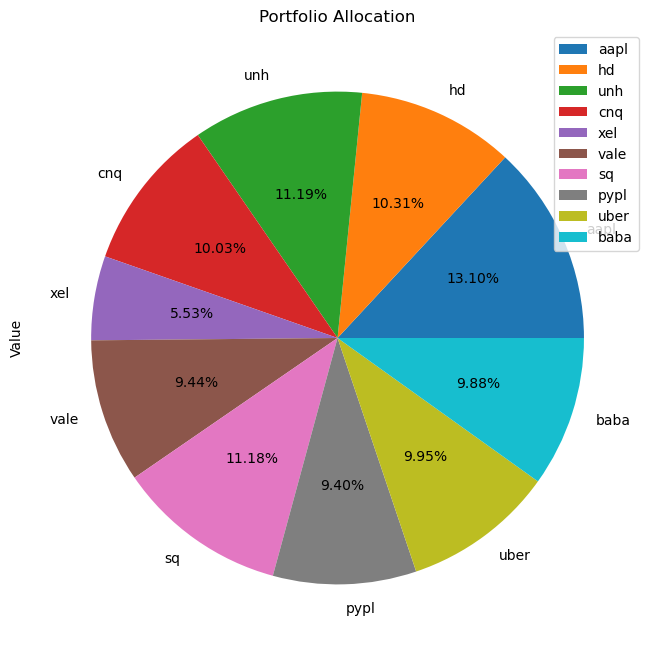

In [2]:
portfolio_df['Stock Holding Value'] = portfolio_df['Current Price'] * portfolio_df['Number of Shares']

total_portfolio_value = portfolio_df['Stock Holding Value'].sum().round(2)
print("Total Portfolio Value:", total_portfolio_value)

portfolio_df = portfolio_df.set_index('Stock Symbol')
each_stock_value = pd.DataFrame((portfolio_df['Current Price'] * portfolio_df['Number of Shares']).round(2))
percentage_of_portfolio = ((each_stock_value / total_portfolio_value) * 100).round(2)

portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ['Value', 'Percentage']
portfolio_summary.plot.pie(y='Value', 
                           autopct='%1.2f%%', 
                           title="Portfolio Allocation", 
                           figsize=(8, 8))
plt.legend(loc='upper right')

# Save plot in the images folder.
plt.savefig('gui_images/portfolio_allocation.png')

In [3]:
portfolio_df

,Number of Shares,Current Price,Stock Holding Value
Stock Symbol,,,
aapl,16.0,192.53,3080.48
hd,7.0,346.55,2425.85
unh,5.0,526.47,2632.35
cnq,36.0,65.52,2358.72
xel,21.0,61.91,1300.11
vale,140.0,15.86,2220.40
sq,34.0,77.35,2629.90
pypl,36.0,61.41,2210.76
uber,38.0,61.57,2339.66


In [17]:
# Reset the index and turn ticker names into upper case letter.
portfolio_df = portfolio_df.reset_index()
portfolio_df['Stock Symbol'] = portfolio_df['Stock Symbol'].str.upper()


# Run if statement to get stock tickers and number of shares.
if 'Stock Symbol' in portfolio_df.columns:
    portfolio_tickers = portfolio_df['Stock Symbol']
if 'Number of Shares' in portfolio_df.columns:
    stock_shares = portfolio_df['Number of Shares']

# Convert stock tickers and number of shares into list .
portfolio_tickers =(portfolio_tickers).tolist()
stock_shares =(stock_shares).tolist()

# Iterates through each stock tickers, download data for each stock for defiend period and 
# store it in historical_data
historical_data = {}
for stock_symbol in portfolio_tickers:
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']

# Convert historical_data to a DataFrame
historical_data_df = pd.DataFrame(historical_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
# Fetch the closing data for Sp 500, Define period you wish to work with.
sp500_data = yf.download('^GSPC',  period="5y") 
sp500_closing_prices = sp500_data['Close']

# Convert to pandas DataFrame, Rename cloumn name to SP500.
sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']


#  Calculate daily retuns of the Market and drop na.
sp500_returns = sp500_closing_prices.pct_change().dropna()

# Convert historical data of portfolio to pandas DataFrame and Calculate daily retuns of portfolio and drop na. 
portfolio_returns = historical_data_df.pct_change().dropna()

# Combine market and portfolio returns to one DataFrame.
combined_returns = pd.merge(sp500_returns, portfolio_returns, on='Date')
combined_returns

[*********************100%%**********************]  1 of 1 completed


,SP500,AAPL,HD,UNH,CNQ,XEL,VALE,SQ,PYPL,UBER,BABA
Date,,,,,,,,,,,
2019-05-13,-0.024131,-0.058119,-0.021791,-0.004323,-0.039901,0.009963,-0.039294,-0.054554,-0.032425,-0.107529,-0.044888
2019-05-14,0.008016,0.015830,0.006725,-0.013024,0.024641,-0.008134,0.005008,0.027569,0.021155,0.077089,0.028410
2019-05-15,0.005839,0.011979,0.000731,-0.001480,-0.002872,-0.001570,-0.003322,0.017470,0.022092,0.033283,0.015786
2019-05-16,0.008895,-0.004400,0.003233,0.003007,0.000720,0.008913,-0.040833,0.017937,0.021256,0.041414,-0.011430
2019-05-17,-0.005837,-0.005682,0.001040,0.019384,-0.019425,0.008315,0.006950,-0.016416,-0.009397,-0.025349,-0.034174
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.001660,-0.005547,-0.001089,0.000827,0.005394,0.008614,-0.001902,0.003121,-0.003545,0.004068,-0.012851
2023-12-26,0.004232,-0.002841,0.002065,-0.000538,0.035408,0.003062,0.012071,0.013482,0.011643,0.004375,0.007572
2023-12-27,0.001430,0.000518,-0.002233,0.005307,-0.014804,-0.011406,0.005022,0.018163,0.001918,0.020974,0.003428


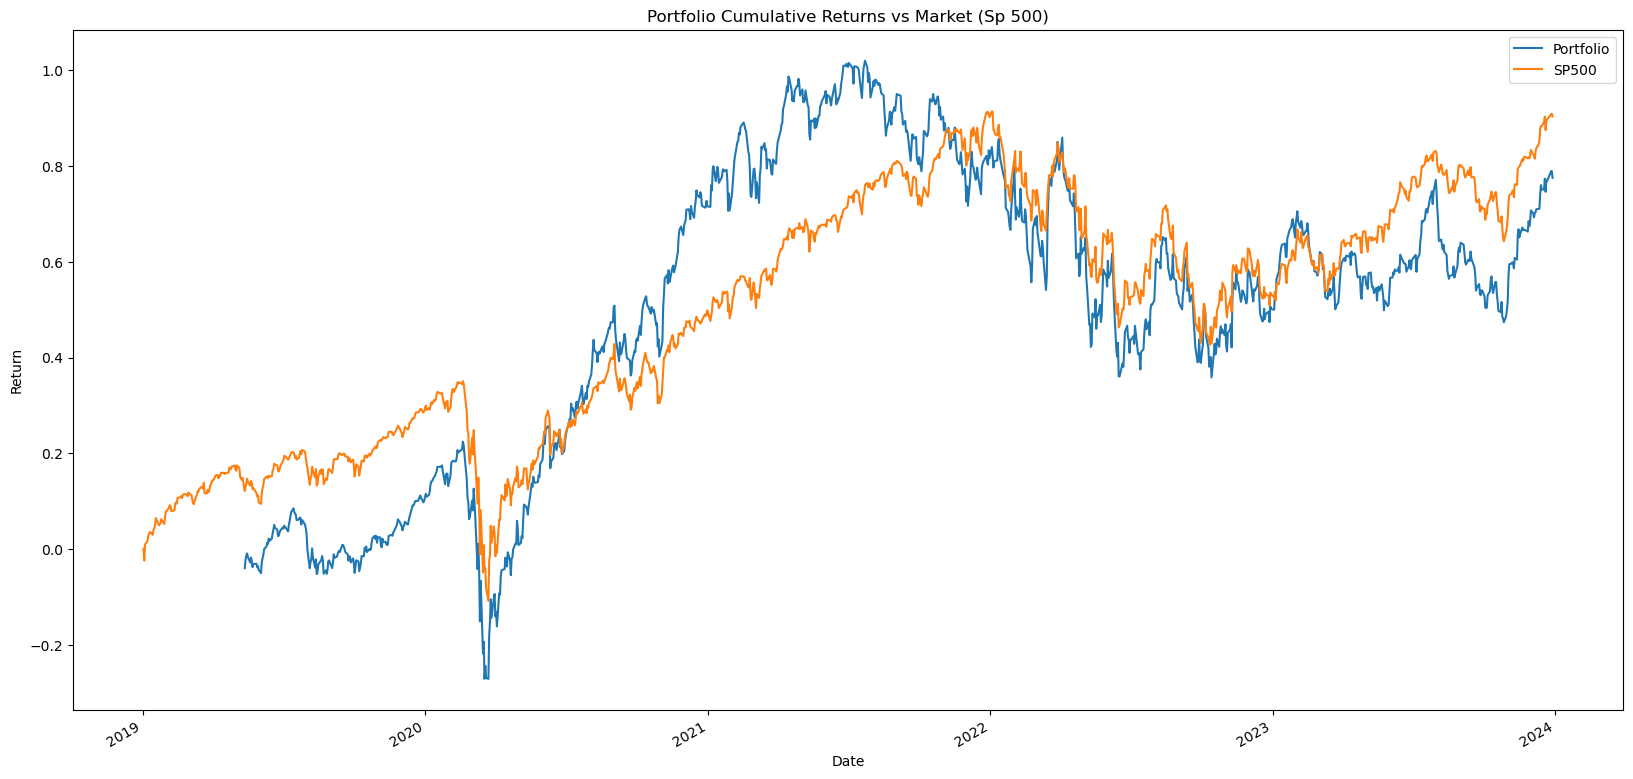

In [19]:
# Calculate the average returns of the portfolio and 
# cumulative returns of the portfolio and then plot it.
portfolio_average_returns = portfolio_returns.mean(axis=1)
portfolio_cumulative_returns = (1 + portfolio_average_returns).cumprod() - 1
ax = portfolio_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
# Calculate cumulative returns of th market and plot it against our portfolio.
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, 
                               label='SP500', 
                               legend=True)

# Save plot in the images folder.
plt.savefig('gui_images/cumulative_returns.png')

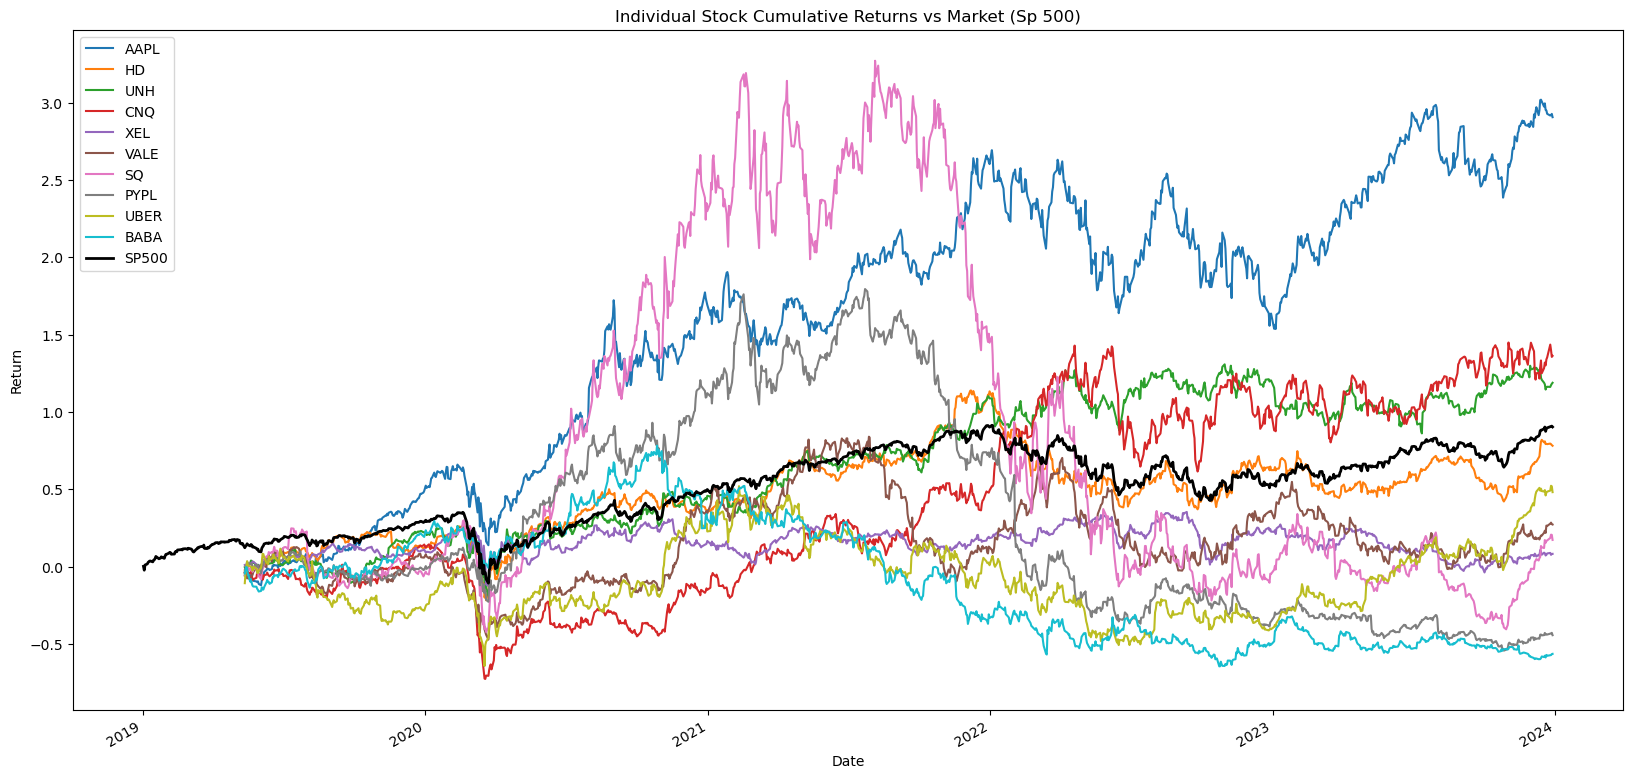

In [20]:
stock_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
ax = stock_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Individual Stock Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, 
                               label='SP500', 
                               legend=True,
                               color='black', 
                               linewidth=2)
plt.savefig('gui_images/individual_cumulative_returns.png')

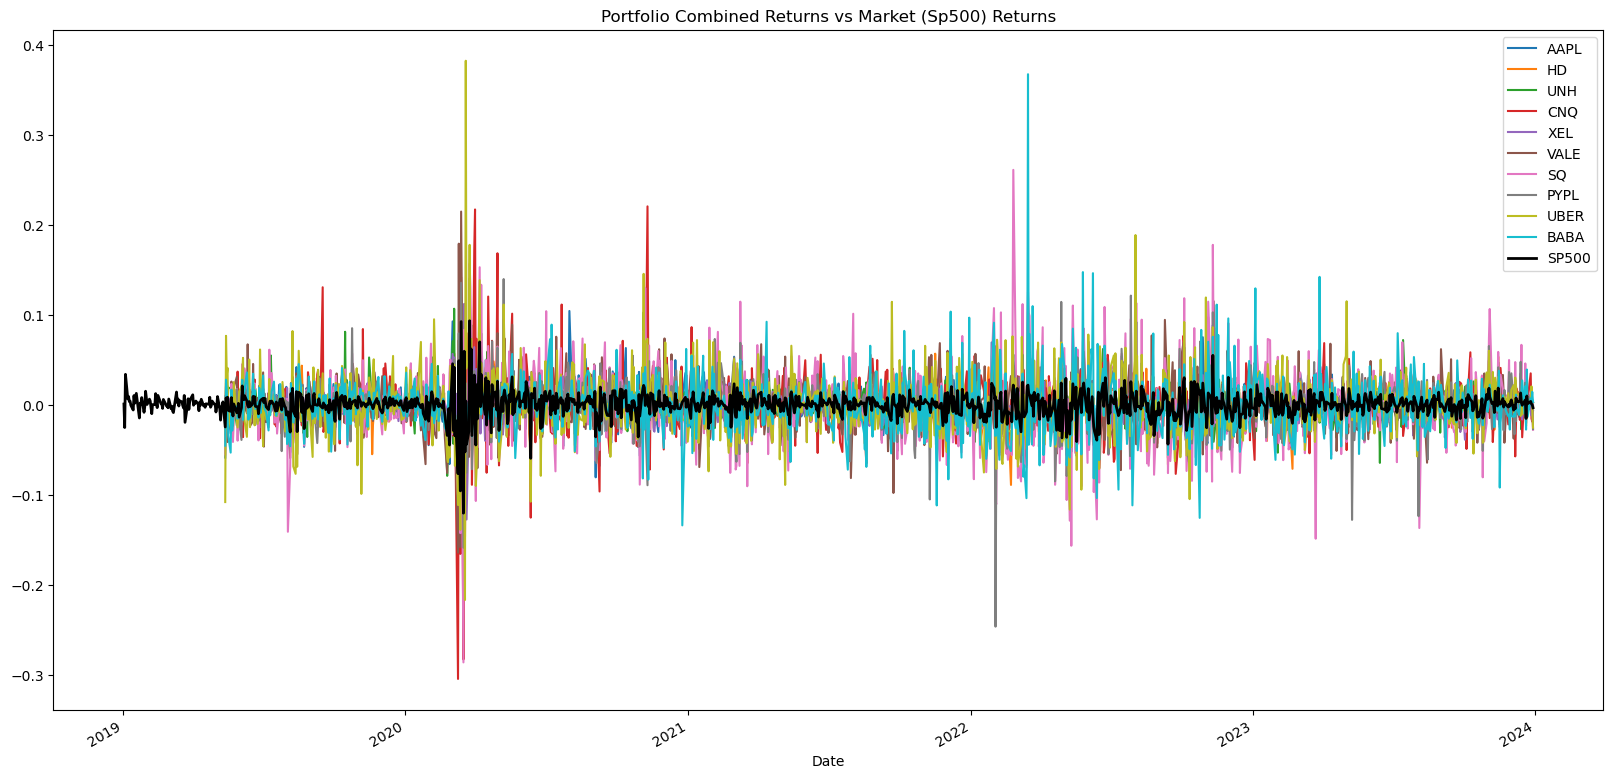

In [21]:
# Plot portfolio retuns and market retuns # Save plot in the images folder.

ax = portfolio_returns.plot(figsize=(20,10),
                       title='Portfolio Combined Returns vs Market (Sp500) Returns', 
                       legend=True)

sp500_returns.plot(ax=ax, label='SP500', 
                               legend=True,
                               color='black', 
                               linewidth=2) 

plt.savefig('gui_images/combined_returns.png')

<Axes: title={'center': 'Portfolio - Beta Trend'}, xlabel='Date'>

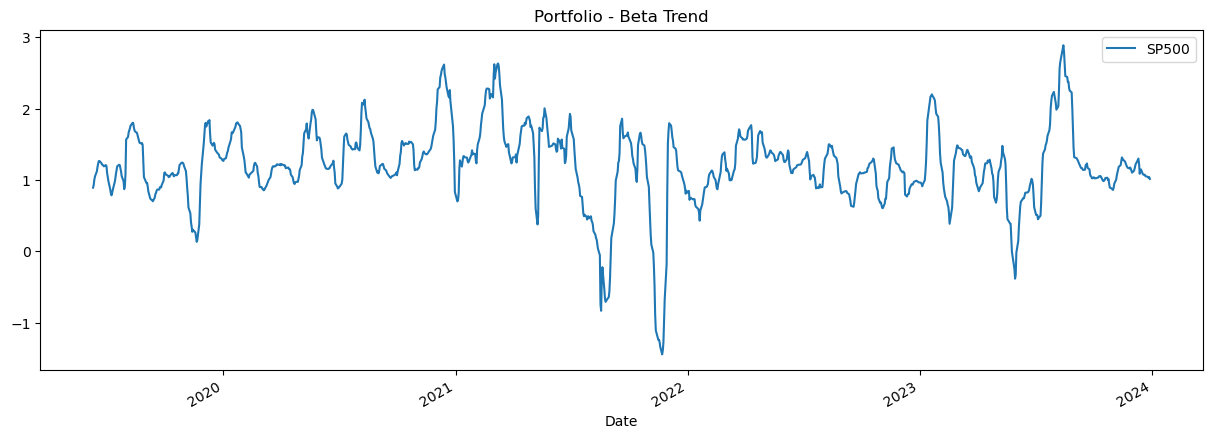

In [22]:
### Calculating the BETA and plotting the BETA trend
# Calculate covariance of a single portfolio
covariance_portfolio = portfolio_cumulative_returns.rolling(window=21).cov(spy500_cumulative_returns)
# Calculate variance of S&P 500
variance_sp500 = spy500_cumulative_returns.rolling(window=21).var()
# Computing beta
portfolio_beta = covariance_portfolio / variance_sp500
# Plot beta trend
portfolio_beta.plot(figsize=(15,5), title = "Portfolio - Beta Trend")

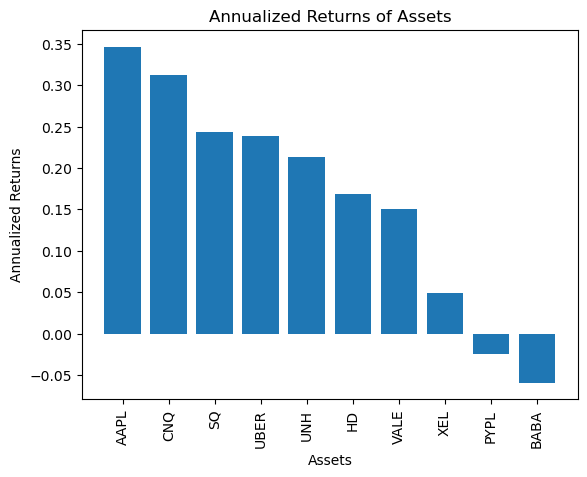

In [23]:
# define the risk free rate
risk_free_rate = 0.04/252 # annualized yield of 3-month Treasury bill divided by 252 trading days

# calculate the excess returns of each stock in the portfolio
excess_returns = portfolio_returns * stock_shares - risk_free_rate


# Calculate the annual returns
annual_daily_returns = portfolio_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Calculate the daily standard deviations
portfolio_returns_std = portfolio_returns.std()

# CAluculating the excess returns
excess_returns_std = excess_returns.std()


######### annual STD

# Calculate the annualized standard deviation (252 trading days)
stock_annualized_std = portfolio_returns_std * np.sqrt(252)
portfolio_annualized_std = excess_returns_std * np.sqrt(252)

# Calculate the stock risk
annual_stock_risk = portfolio_returns_std * math.sqrt(252)
annual_excess_risk = excess_returns_std * math.sqrt(252)

# Sorted the data in decending order
sorted_annual_returns = annual_daily_returns.sort_values(ascending=False)
sorted_annual_excess_returns = annual_excess_returns.sort_values(ascending=False)


# plot the sorted annualized returns of stock
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel("Annualized Returns")
plt.xlabel('Assets')

plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets')
plt.savefig('gui_images/annualized_returns.png')

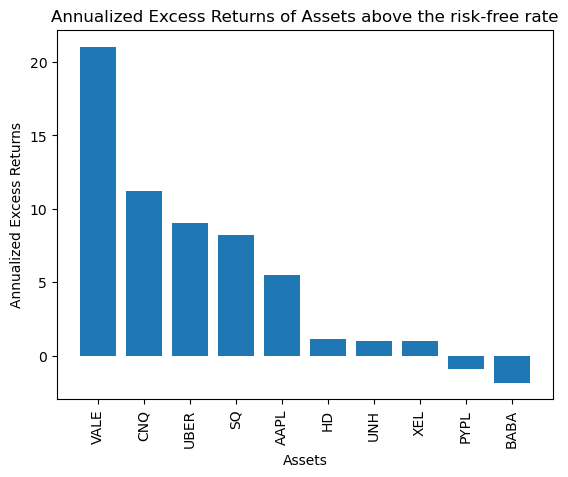

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot of the excess annual returns
# plot the sorted annualized returns of stock
plt.bar(sorted_annual_excess_returns.index, sorted_annual_excess_returns)
plt.ylabel("Annualized Excess Returns")
plt.xlabel('Assets')
plt.xticks(rotation=90)
plt.title('Annualized Excess Returns of Assets above the risk-free rate')
plt.show()


plt.savefig('gui_images/annualized_excess_returns.png')

In [25]:
# creat a dataframe to store the annual returns, annual risks, 
# annual excess returns and company ticker and new column for the ratio

risk_df = pd.DataFrame()
risk_df['Expected Annual Returns'] = annual_daily_returns
risk_df['Expected Annual Risk'] = annual_stock_risk
risk_df['Expected Annual Excess Returns'] = annual_excess_returns
risk_df['Stock'] = portfolio_tickers
risk_df['Ratio'] = risk_df['Expected Annual Returns'] / risk_df['Expected Annual Risk']

# show in decending order for the expected annual returns
risk_df.sort_values(by="Ratio", axis = 0, ascending=False, inplace=False)


,Expected Annual Returns,Expected Annual Risk,Expected Annual Excess Returns,Stock,Ratio
AAPL,0.346603,0.324133,5.505654,AAPL,1.069325
UNH,0.212881,0.295977,1.024406,UNH,0.719250
CNQ,0.312227,0.497464,11.200188,CNQ,0.627639
HD,0.168043,0.292705,1.136302,HD,0.574105
UBER,0.238728,0.560664,9.031671,UBER,0.425796
SQ,0.243662,0.646034,8.244499,SQ,0.377165
VALE,0.150650,0.445801,21.051061,VALE,0.337932
XEL,0.048998,0.252284,0.988956,XEL,0.194217
PYPL,-0.024586,0.449043,-0.925102,PYPL,-0.054752
BABA,-0.059160,0.496849,-1.814806,BABA,-0.119071


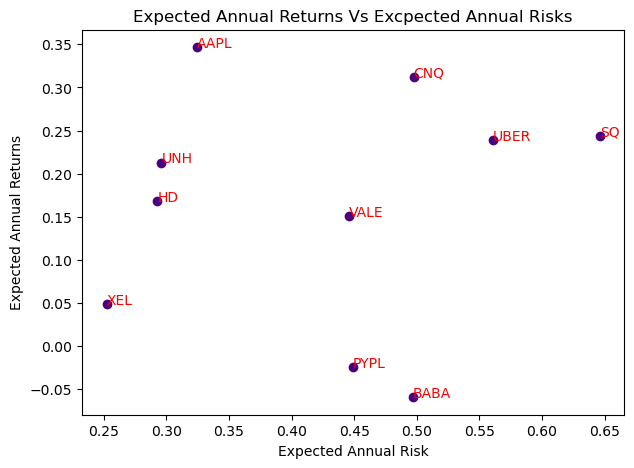

In [26]:
# visually show the ecpected annual returns vs the expected annual risk
risk_df.hvplot.bar()

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Expected Annual Returns Vs Excpected Annual Risks')
ax.scatter(risk_df['Expected Annual Risk'], risk_df['Expected Annual Returns'], c = "indigo")
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')
          
# note the points on plot
for idx, row in risk_df.iterrows():
    ax.annotate(row["Stock"], (row['Expected Annual Risk'], row['Expected Annual Returns']), c = 'red')
plt.savefig('gui_images/portfolio_risk_return.png')

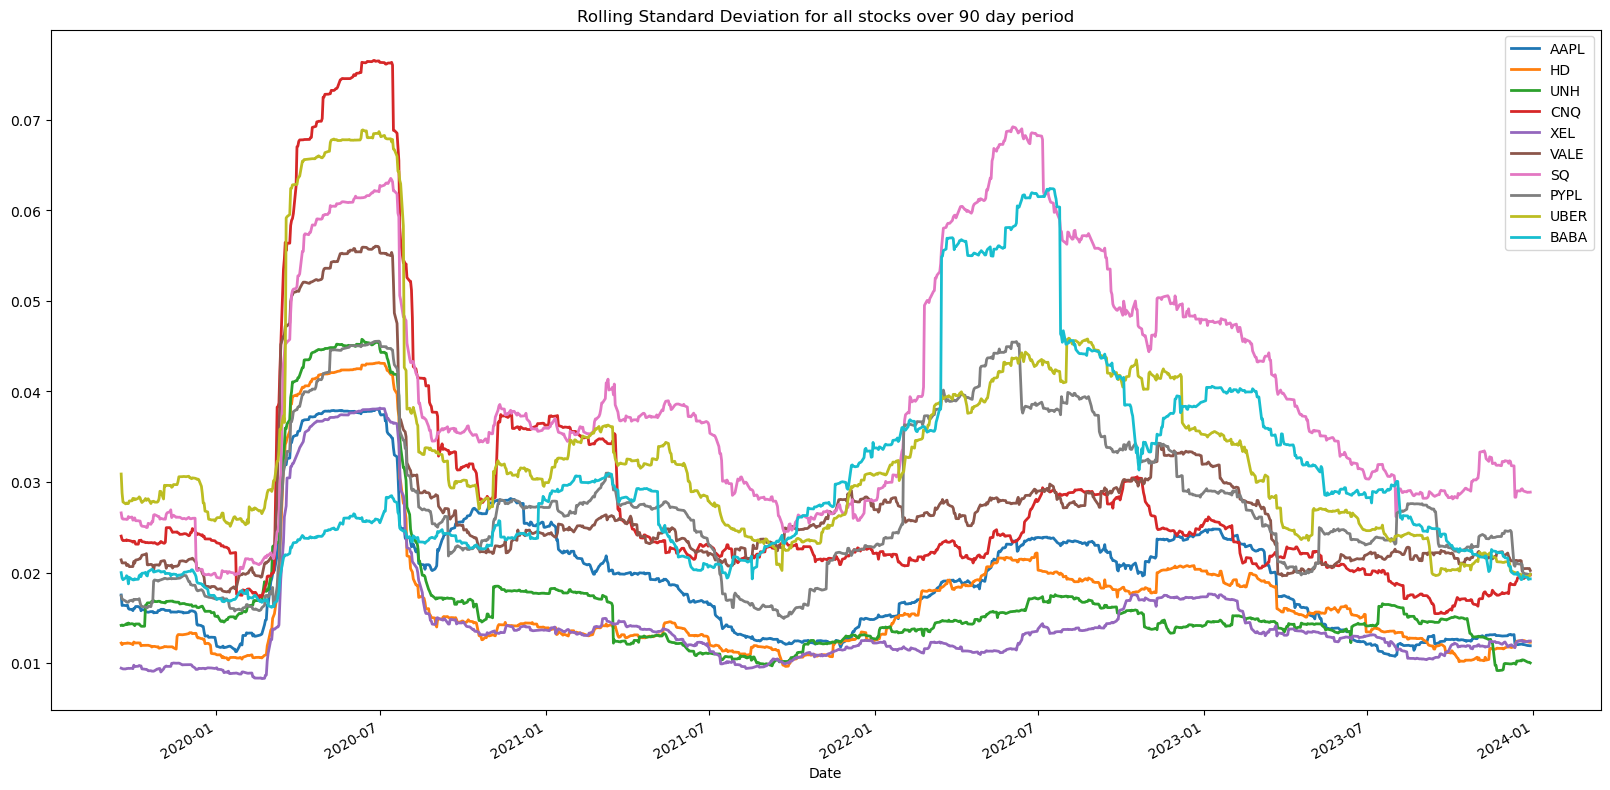

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 90-day window
rolling_std = portfolio_returns.rolling(window=90).std()
#excess_rolling_std = excess_returns.rolling(window=90).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), linewidth=2, title= 'Rolling Standard Deviation for all stocks over 90 day period')
plt.savefig('gui_images/standard_deviation.png')

# Plotting excess
#excess_rolling_std.plot(figsize=(20,10), title= 'Rolling Standard Deviation of excess returns for stocks over 90 day period')
#plt.savefig('gui_images/excess_return.png')

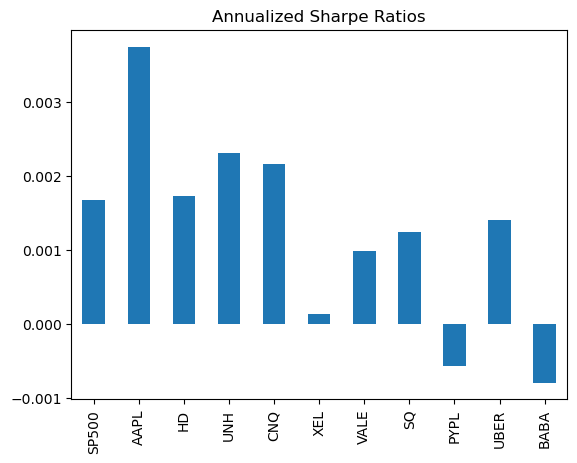

In [30]:
# Annualized Sharpe Ratios. Calculate sharpe ratio assuming risk free rate is 0
risk_free_rate
annualized_sharpe = ((combined_returns.mean() - risk_free_rate) / (combined_returns.std() * np.sqrt(252)))
# Visualize the sharpe ratios as a bar plot
annualized_sharpe.plot(kind='bar', 
                       title='Annualized Sharpe Ratios')
plt.savefig('gui_images/annualized_sharpe.png')

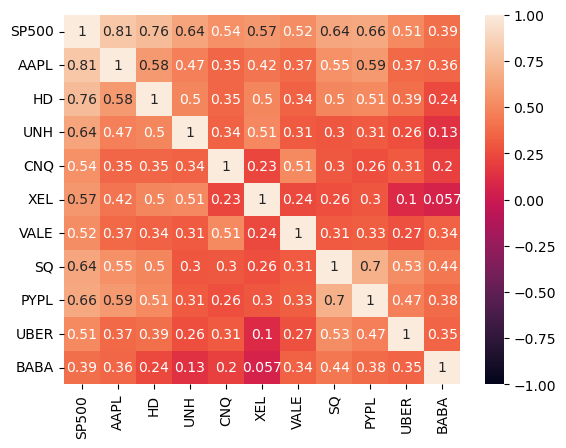

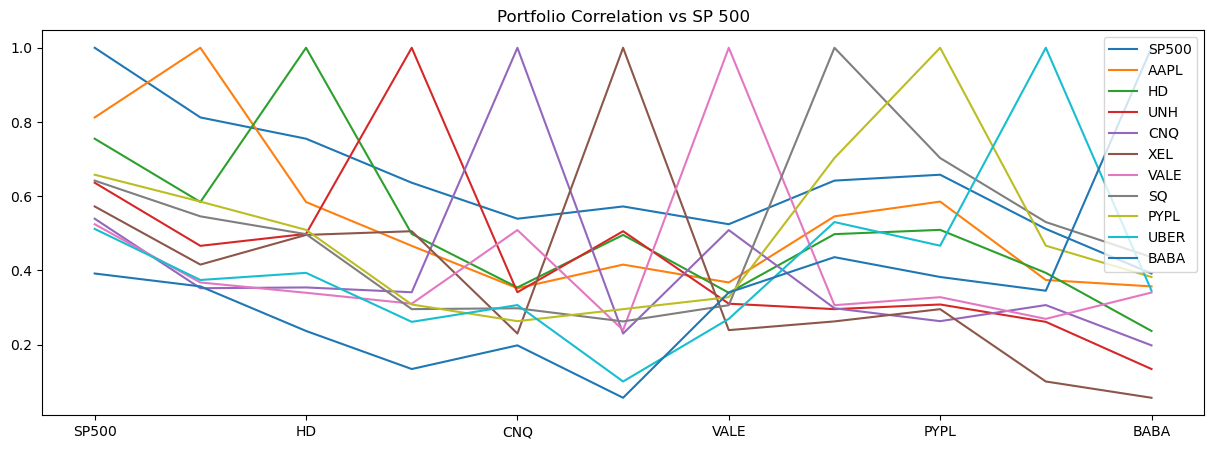

In [31]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
plt.savefig('gui_images/correlation_heatmap.png')

correlation_matrix.plot(figsize=(15,5), title='Portfolio Correlation vs SP 500')
plt.savefig('gui_images/portfolio_correlation.png')

In [32]:
# Calculate portflio weight
portfolio_weights = [(percentage / 100) for percentage in portfolio_summary['Percentage'].tolist()]

# Create empty disctionaty for portfolio data to save all downloaded data.
# Run "for" loop to iterate through each stock ticker in the list and 
# download all data in defined period of time.
portfolio_data = {}
for stock_symbol in portfolio_tickers:
    stock_data = yf.download(stock_symbol, period="5y")
    portfolio_data[stock_symbol] = stock_data


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [33]:
# Concatenate portfolio data, concatenate along the columns and asign keys for each stock
portfolio_data_df = pd.concat(portfolio_data.values(),  axis=1, keys=portfolio_data.keys())

# Change column names to upper case for tickers and lower case for definition
portfolio_data_df.columns = portfolio_data_df.columns.map(lambda x: (x[0].upper(), x[1].lower()))
portfolio_data_df

AAPL                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2018-12-31   39.632500   39.840000   39.119999   39.435001   37.850147   
2019-01-02   38.722500   39.712502   38.557499   39.480000   37.893337   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.118877   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.575386   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.496204   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.529999   

                               HD                                      ...  \
               volume        open        high         low       close  ...   
Date                                                                   ...   
2018-12-31  140014000  171.470001  173.240005  170.649994  171.820007  ...   
2019-01-02  148158800  169.710007  173.179993  169.050003  172.410004  ...   
2019-01-03  365248800  171.839996  171.839996  168.210007  168.610001  ...   
2019-01-04  234428400  170.179993  174.740005  169.520004  173.619995  ...   
2019-01-07  219111200  173.830002  178.179993  173.830002  177.039993  ...   
...               ...         ...         ...         ...         ...  ...   
2023-12-22   37122800  349.040009  351.339996  346.690002  348.589996  ...   
2023-12-26   28919300  348.429993  350.089996  348.160004  349.309998  ...   
2023-12-27   48087700  349.910004  350.000000  347.179993  348.529999  ...   
2023-12-28   34049900  348.500000  349.040009  345.799988  347.359985  ...   
2023-12-29   42628800  345.829987  347.549988  343.019989  346.549988  ...   

                 UBER                                          BABA  \
                  low      close  adj close      volume        open   
Date                                                                  
2018-12-31        NaN        NaN        NaN         NaN  141.830002   
2019-01-02        NaN        NaN        NaN         NaN  134.130005   
2019-01-03        NaN        NaN        NaN         NaN  134.270004   
2019-01-04        NaN        NaN        NaN         NaN  134.259995   
2019-01-07        NaN        NaN        NaN         NaN  140.550003   
...               ...        ...        ...         ...         ...   
2023-12-22  61.279999  61.709999  61.709999  14709400.0   74.500000   
2023-12-26  61.313999  61.980000  61.980000  16077200.0   76.160004   
2023-12-27  62.000000  63.279999  63.279999  20806000.0   76.279999   
2023-12-28  62.834999  63.139999  63.139999  13795600.0   77.230003   
2023-12-29  61.299999  61.570000  61.570000  21602500.0   77.059998   

                                                                      
                  high         low       close   adj close    volume  
Date                                                                  
2018-12-31  142.020004  136.039993  137.070007  135.251862  11186400  
2019-01-02  137.748993  133.029999  136.699997  134.886765  16708400  
2019-01-03  134.869995  129.830002  130.600006  128.867676  19531300  
2019-01-04  141.080002  133.660004  139.750000  137.896301  22845400  
2019-01-07  144.080002  139.009995  143.100006  141.201874  17239000  
...                ...         ...         ...         ...       ...  
2023-12-22   75.680000   74.440002   75.279999   75.279999  19962800  
2023-12-26   76.969002   75.730003   75.849998   75.849998  13121300  
2023-12-27   76.449997   75.410004   76.110001   76.110001  14904500  
2023-12-28   77.790001   76.980003   77.2

In [34]:
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = portfolio_data_df,
    weights = portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

# Calculate daily return for portfolio and add name column 
MC_10years.portfolio_data.dropna()

AAPL                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2019-05-13   46.927502   47.369999   45.712502   46.430000   44.927498   
2019-05-14   46.602501   47.424999   46.352501   47.165001   45.638714   
2019-05-15   46.567501   47.937500   46.505001   47.730000   46.185429   
2019-05-16   47.477501   48.117500   47.209999   47.520000   45.982220   
2019-05-17   46.732498   47.724998   46.689999   47.250000   45.720963   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.529999   

                                            HD                          ...  \
               volume daily_return        open        high         low  ...   
Date                                                                    ...   
2019-05-13  229722400    -0.058119  191.000000  191.660004  189.139999  ...   
2019-05-14  146118800     0.015830  190.500000  192.759995  190.009995  ...   
2019-05-15  106178800     0.011979  190.809998  192.809998  190.270004  ...   
2019-05-16  132125600    -0.004400  192.470001  194.960007  192.199997  ...   
2019-05-17  131516400    -0.005682  190.860001  194.500000  190.750000  ...   
...               ...          ...         ...         ...         ...  ...   
2023-12-22   37122800    -0.005547  349.040009  351.339996  346.690002  ...   
2023-12-26   28919300    -0.002841  348.429993  350.089996  348.160004  ...   
2023-12-27   48087700     0.000518  349.910004  350.000000  347.179993  ...   
2023-12-28   34049900     0.002226  348.500000  349.040009  345.799988  ...   
2023-12-29   42628800    -0.005424  345.829987  347.549988  343.019989  ...   

                 UBER                                 BABA              \
            adj close      volume daily_return        open        high   
Date                                                                     
2019-05-13  37.099998  79442400.0    -0.107529  169.789993  172.470001   
2019-05-14  39.959999  46661100.0     0.077089  172.750000  175.149994   
2019-05-15  41.290001  36086100.0     0.033283  177.059998  180.240005   
2019-05-16  43.000000  38115500.0     0.041414  178.179993  178.250000   
2019-05-17  41.910000  20225700.0    -0.025349  171.690002  172.289993   
...               ...         ...          ...         ...         ...   
2023-12-22  61.709999  14709400.0     0.004068   74.500000   75.680000   
2023-12-26  61.980000  16077200.0     0.004375   76.160004   76.969002   
2023-12-27  63.279999  20806000.0     0.020974   76.279999   76.449997   
2023-12-28  63.139999  13795600.0    -0.002212   77.230003   77.790001   
2023-12-29  61.570000  21602500.0    -0.024865   77.059998   77.635002   

                                                                       
                   low       close   adj close    volume daily_return  
Date                                                                   
2019-05-13  168.779999  170.009995  167.754929  22330700    -0.044888  
2019-05-14  171.479996  174.839996  172.520859  17874100     0.028410  
2019-05-15  173.320999  177.600006  175.244263  37610400     0.015786  
2019-05-16  174.750000  175.570007  173.241180  20579200    -0.011430  
2019-05-17  168.490005  169.570007  167.320770  22539400    -0.034174  
...                ...         ...         ...       ...          ...  
2023-12-22   74.440002   75.279999   75.279999  19962800    -0.012851  
2023-12-26   75.730003   75.849998   75.849998  13121300     0.007572  
2023-12-27   75.410004   76.110001   76.11000

In [35]:
# Run monte carlo simulation
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994291,1.005679,0.986764,1.005082,1.000081,0.996525,0.997661,0.994073,0.996013,0.998190,...,1.000612,1.009488,1.011379,0.983223,0.999788,0.984214,0.993784,0.983519,1.001296,0.991811
2,0.986851,1.000194,1.000426,1.022964,1.018976,0.999457,1.011442,0.987469,0.976769,0.997211,...,1.002653,1.017475,1.006451,0.996639,1.007812,0.979477,0.995768,0.983431,0.992665,1.004318
3,0.977295,1.001332,0.989182,1.026553,1.022346,1.002118,1.009007,0.973395,0.978644,0.991910,...,0.995010,1.001494,0.997166,0.996218,1.017306,0.962671,0.998120,0.998359,0.982909,1.000282
4,0.973914,1.006354,0.991667,1.007201,1.031143,1.024082,1.020725,0.961652,0.974889,1.006667,...,1.001198,0.998166,1.004700,0.999444,1.014521,0.952744,1.000840,0.978038,0.977299,0.985152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.463759,7.442837,7.234881,7.236081,7.976565,9.163611,4.984086,4.533865,2.841741,16.609743,...,12.360999,3.573950,8.599472,12.199492,4.115774,4.970931,8.628825,7.499196,13.424701,9.088762
2517,6.435880,7.385437,7.366369,7.191320,8.058208,9.095271,5.015116,4.510092,2.819823,16.641998,...,12.162497,3.582726,8.541497,12.240659,4.162364,4.937060,8.588332,7.415779,13.465809,9.162529
2518,6.403421,7.344338,7.461023,7.268681,8.213629,9.123239,5.081429,4.539112,2.816827,16.455698,...,12.275807,3.546194,8.559091,12.213939,4.074394,4.908428,8.674957,7.476271,13.612200,9.174589
2519,6.440004,7.308830,7.474726,7.305600,8.063275,9.153267,5.006201,4.594160,2.789408,16.397137,...,12.204465,3.579601,8.559042,12.164409,4.060198,4.990139,8.724598,7.400441,13.767628,9.289668


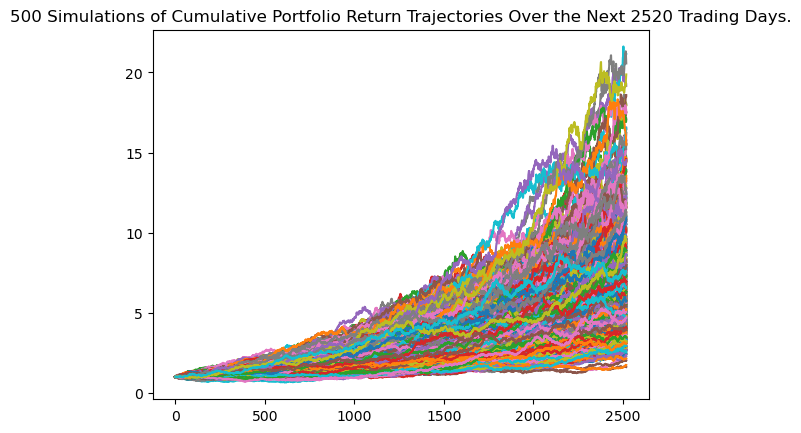

In [73]:
# Plot simulation outcomes 
line_plot = MC_10years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("gui_images/Monte_Carlo_10_year", bbox_inches="tight")

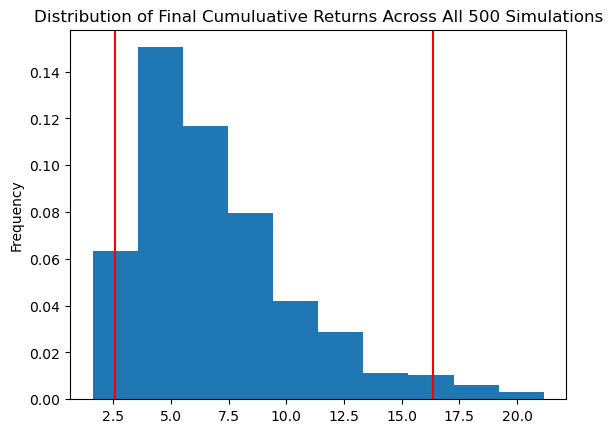

In [74]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_10years.plot_distribution()

# Save the plot for future usage
distribution_plot.get_figure().savefig('gui_images/Monte_Carlo_10year_dist_plot.png',bbox_inches='tight')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary = MC_10years.summarize_cumulative_return()

# Set initial investment
initial_investment_10year = total_portfolio_value

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes.
ci_lower_ten = round(MC_summary[8] * initial_investment_10year,2)
ci_upper_ten = round(MC_summary[9] * initial_investment_10year,2)
ci_average_ten = round((ci_lower_ten + ci_upper_ten)/2,2)




# Calculate annual return and annual percetage return on average.
annual_lower_return_10 = ((ci_lower_ten - initial_investment_10year) / 10)
annual_lower_percent_10 = annual_lower_return_10 / initial_investment_10year


annual_upper_return_10 = ((ci_upper_ten - initial_investment_10year) / 10)
annual_upper_percent_10 = annual_upper_return_10 / initial_investment_10year





annual_average_return_10 = ((ci_average_ten - initial_investment_10year) / 10)
annual_average_percent_10 = annual_average_return_10 / initial_investment_10year





# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10year:.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f"\n${ci_lower_ten} (Lower Annual Percent Change for 10 years: {annual_lower_percent_10 * 100:.2f}%) and" 
      f"\n${ci_upper_ten} (Upper Annual Percent Change for 10 years: {annual_upper_percent_10 * 100:.2f}%)."
      f"\nOn average {ci_average_ten} (Average Annual Percent Change for 10 years: {annual_average_percent_10 * 100:.2f}%)")

There is a 95% chance that an initial investment of $23523.53 in the portfolio over the next 10 years will end within in the range of
$62667.48 (Lower Annual Percent Change for 10 years: 16.64%) and
$358624.21 (Upper Annual Percent Change for 10 years: 142.45%).
On average 210645.84 (Average Annual Percent Change for 10 years: 79.55%)
